In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import random

In [ ]:
np.random.seed(10)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)

In [ ]:
population_ages = np.concatenate((population_ages1, population_ages2))
print(len(population_ages))
min(population_ages), max(population_ages)

250000


(18, 81)

In [ ]:
print('mu: ',population_ages.mean())
print('median: ', np.median(population_ages))
print('std: ', population_ages.std())

mu:  43.002372
median:  47.0
std:  13.229146547438953


In [ ]:
np.random.seed(6)
sample1 = np.random.choice(a=population_ages, size=5000)

print('x_bar: ',sample1.mean())
print('mu: ',population_ages.mean())
print(population_ages.mean() - sample1.mean())

x_bar:  42.847
mu:  43.002372
0.15537199999999984


In [ ]:
np.random.seed(10)

point_estimation = []

for i in range(200):
    sample = np.random.choice(a=population_ages, size=500)
    point_estimation.append(sample.mean())

print(len(point_estimation))

200


In [ ]:
min(point_estimation), max(point_estimation)

(41.554, 44.702)

<Axes: ylabel='Density'>

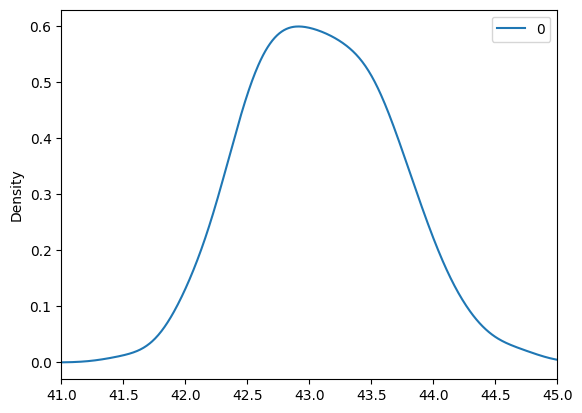

In [ ]:
# Density plot for sample means/ point estimaties.
pd.DataFrame(point_estimation).plot(kind='density', xlim=(41,45))

-0.12008483603917186


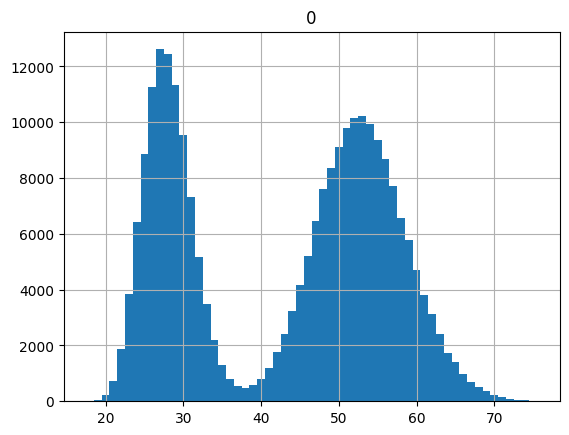

In [ ]:
# Histogram for population data
pd.DataFrame(population_ages).hist(bins=58, range=(17.5, 75.5))
print(stats.skew(population_ages))

-0.07594784926404424


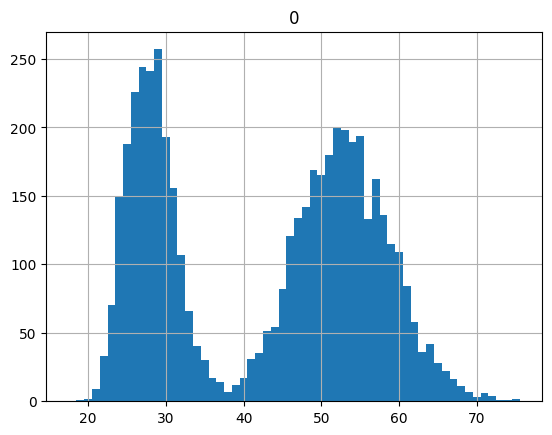

In [ ]:
# Histogram for sample data
pd.DataFrame(sample1).hist(bins=58, range=(17.5, 75.5))
print(stats.skew(sample1))

## Calculate 95% confidence for our mean point estimation

In [ ]:
# population mean and S.D
np.random.seed(10)
print('population mean estimation:', population_ages.mean())
pop_stdev = population_ages.std()

# sample data and sample mean
sample_size = 5000
sample = np.random.choice(a=population_ages, size=sample_size)
print('sample mean:', sample.mean())

# Get the z-critical value*
z_critical = stats.norm.cdf(x = 0.95)
print('z-critical value:',z_critical)

# confidence Interval for 95% confidence level.
margin_of_error = z_critical * (pop_stdev / np.sqrt(sample_size))


confidence_interval = (sample.mean() - margin_of_error,
                       sample.mean() + margin_of_error)
print('confidence interval:', confidence_interval)

population mean estimation: 43.002372
sample mean: 42.8514
z-critical value: 0.8289438736915182
confidence interval: (42.69631422969717, 43.006485770302824)


In [ ]:
np.random.seed(12)
sample_size = 1000

CI_intervals = []
sample_means = []

for sample in range(25):
  sample = np.random.choice(a=population_ages, size=sample_size)
  sample_mean = round(sample.mean(),2)
  sample_means.append(sample.mean())
  z_critical = stats.norm.cdf(x = 0.95)
  pop_stdev = population_ages.std()
  margin_of_error = z_critical * (pop_stdev / np.sqrt(sample_size))
  confidence_interval = (round(sample_mean - margin_of_error, 2),
                       round(sample_mean + margin_of_error, 2))
  CI_intervals.append(confidence_interval)

print(CI_intervals)

[(42.91, 43.61), (42.83, 43.53), (43.16, 43.86), (42.59, 43.29), (42.31, 43.01), (43.21, 43.91), (42.61, 43.31), (42.23, 42.93), (42.0, 42.7), (43.01, 43.71), (43.05, 43.75), (42.96, 43.66), (42.2, 42.9), (42.81, 43.51), (43.11, 43.81), (42.61, 43.31), (42.27, 42.97), (42.7, 43.4), (42.72, 43.42), (42.56, 43.26), (42.16, 42.86), (42.56, 43.26), (43.87, 44.57), (42.43, 43.13), (42.9, 43.6)]


In [ ]:
sample_mean_CI = pd.DataFrame({'CI_intervals':CI_intervals, 'Sample_mean':sample_means})
print(sample_mean_CI)

      CI_intervals  Sample_mean
0   (42.91, 43.61)       43.258
1   (42.83, 43.53)       43.175
2   (43.16, 43.86)       43.510
3   (42.59, 43.29)       42.941
4   (42.31, 43.01)       42.661
5   (43.21, 43.91)       43.559
6   (42.61, 43.31)       42.958
7   (42.23, 42.93)       42.576
8     (42.0, 42.7)       42.346
9   (43.01, 43.71)       43.360
10  (43.05, 43.75)       43.395
11  (42.96, 43.66)       43.313
12    (42.2, 42.9)       42.551
13  (42.81, 43.51)       43.156
14  (43.11, 43.81)       43.463
15  (42.61, 43.31)       42.955
16  (42.27, 42.97)       42.619
17    (42.7, 43.4)       43.050
18  (42.72, 43.42)       43.070
19  (42.56, 43.26)       42.911
20  (42.16, 42.86)       42.514
21  (42.56, 43.26)       42.910
22  (43.87, 44.57)       44.221
23  (42.43, 43.13)       42.781
24    (42.9, 43.6)       43.250


In [ ]:
sample_mean_CI['Sample_mean'].skew()

0.6250738346243871

<Axes: ylabel='Density'>

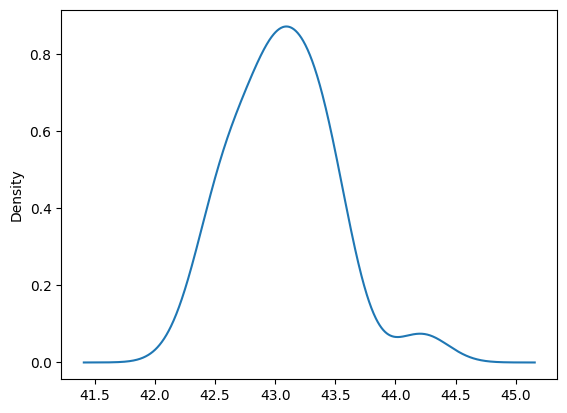

In [ ]:
sample_mean_CI['Sample_mean'].plot(kind='density')

## T distribution confidence interval

In [ ]:
np.random.seed(10)
sample_size = 25
sample = np.random.choice(a=population_ages, size=sample_size)
sample_mean = sample.mean()
print('sample mean:', sample_mean)

# Get the t-critical value*
t_critical = stats.t.ppf(q = 0.975, df=24)
print('t-critical value:',t_critical)

sample_stdev = sample.std(ddof=1)
sigma = sample_stdev / np.sqrt(sample_size)

# confidence Interval for 95% confidence level.
margin_of_error = t_critical * sigma
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)
print('confidence interval:', confidence_interval)

sample mean: 42.88
t-critical value: 2.0638985616280205
confidence interval: (37.65147508161371, 48.108524918386294)


In [ ]:
# confidence interval for t distribution using interval function.
stats.t.interval(confidence = 0.95,    # Confidence level  (alpha)
                 df=24,                 # Degrees of freedom
                 loc=sample_mean,      # Sample mean
                 scale=sigma)           # Standard Deviation Estimate

(37.65147508161371, 48.108524918386294)

In [ ]:
# Proportion data/ Qualitative data

In [ ]:
import random

random.seed(10)
population_races = (['white']*100000) + (['black']*50000) + \
                   (['hispanic']*50000) + (['asian']*25000) + (['other']*25000)
print(len(population_races))

# sample data from population_races
demo_sample = random.sample(population_races, 500)
for race in set(demo_sample):
  print(race +' proportion estimate:' )
  print(demo_sample.count(race)/500)


250000
black proportion estimate:
0.24
asian proportion estimate:
0.104
white proportion estimate:
0.368
hispanic proportion estimate:
0.184
other proportion estimate:
0.104


In [ ]:
z_critical = stats.norm.ppf(0.975)
p = 0.192
n = 1000
margin_of_error = z_critical * np.sqrt((p * (1 - p)) / n)

# confidence interval
confidence_interval = (p - margin_of_error,
                       p + margin_of_error)
print('confidence interval:', confidence_interval)

confidence interval: (0.16758794241348748, 0.21641205758651252)


In [ ]:
stats.norm.interval(confidence=0.975,
                    loc= 0.192,
                    scale=np.sqrt((p * (1 - p)) / n))

(0.16408252146852653, 0.2199174785314735)